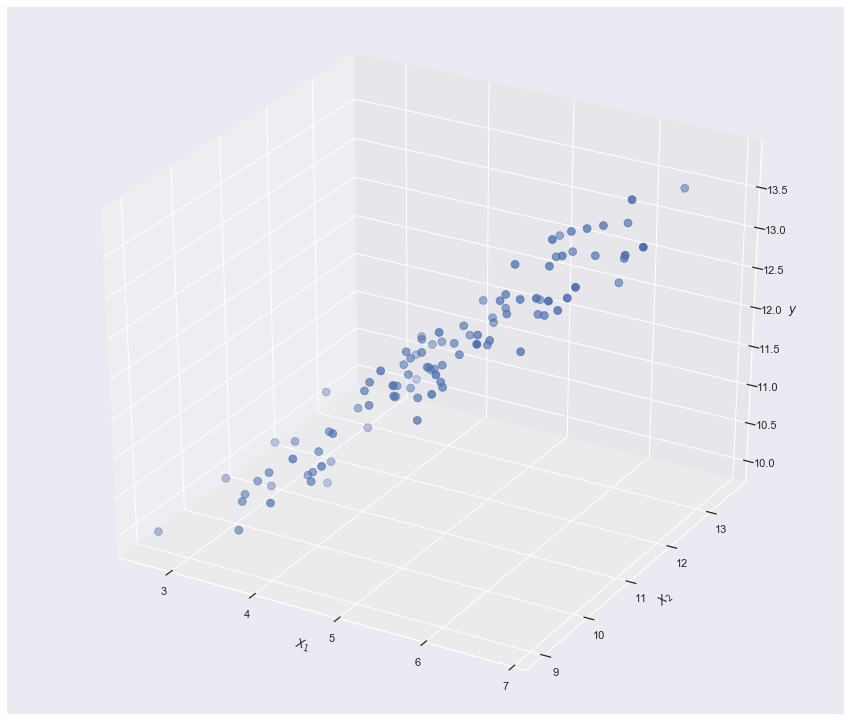

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
%matplotlib inline

num_samples = 100

# The mean values of the three dimensions .
mu = np.array([5, 11, 12])

# The desired covariance matrix.
cov = np.array([
        [1.00, 0.85, 0.95],
        [0.85, 1.00, 0.90],
        [0.95, 0.90, 1.00]
    ])

# Generate the random samples.
df = np.random.multivariate_normal(mu, cov, size=num_samples)

# Plot various projections of the samples.
fig = plt.figure(figsize=(15, 13))

# Fourth subplot
ax4 = fig.add_subplot(1, 1, 1, projection= "3d")
ax4.scatter(df[:,0], df[:,1], df[:,2],s = 60)
ax4.set_xlabel(r'$X_{1}$')
ax4.set_ylabel(r'$X_{2}$')
ax4.set_zlabel(r'$y$')

plt.show()

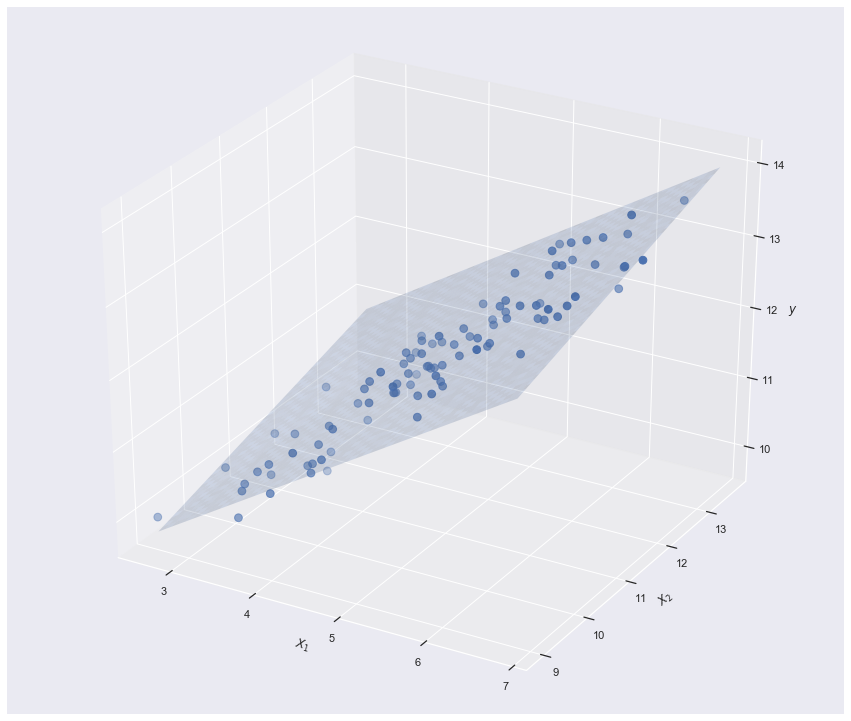

In [169]:
# regular grid covering the domain of the data
y = df[:,2]
X = np.delete(df, 2, 1)
# create vector of ones...
I = np.ones(shape=y.shape)[..., None]

#...and add to feature matrix
X = np.concatenate((I, X), 1)
# calculate coefficients using closed-form solution
coeffs = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
yhat = X.dot(coeffs)
X = X[:,1:]
mn = np.min(X, axis=0)
mx = np.max(X, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 100),np.linspace(mn[1], mx[1],100))
# evaluate it on grid
Z = coeffs[1]*X + coeffs[2]*Y + coeffs[0]
fig = plt.figure(figsize=(15,13))
ax = fig.gca(projection='3d')
# Plot the surface.
ax.scatter(df[:,0], df[:,1], df[:,2], s=60)
ax.plot_surface(X, Y, Z,alpha=0.2, linewidth=0, antialiased= True)
plt.xlabel(r'$X_{1}$')
plt.ylabel(r'$X_{2}$')
ax.set_zlabel(r'$y$')
plt.show()

In [139]:
SSE = sum((y-yhat)**2)
print(SSE)

6.790179411030153


In [141]:
TSS = sum((y-y.mean())**2)
print(TSS)

85.42958844452086


In [142]:
R_Squared = 1.0 - (SSE /TSS)
print(R_Squared)

0.9205172407515484


In [143]:
#1-(1-R2)*N-1/N-M-1
Adj_R2 = 1.0 - (1.0 - R_Squared) * 99/97
Adj_R2

0.9188784209732298